## testing may inventory

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import geopandas as gpd
from shapely.geometry import Point
import datetime
%matplotlib inline

In [2]:
%%time
july = pd.read_csv('../data/july.csv')
july = july.sort_values('companyname')

Wall time: 43.2 s


In [3]:
july.head(10)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
18106104,2019-07-22 23:52:06.760000,36.173757,-86.784629,PoweredJALW3,Powered,100.0,scooter,0.15,Bird
9013191,2019-07-11 12:06:22.510000,36.157701,-86.784192,PoweredNLTKH,Powered,100.0,scooter,0.15,Bird
9013190,2019-07-11 12:06:22.510000,36.148716,-86.807103,PoweredBNP4F,Powered,100.0,scooter,0.15,Bird
9013189,2019-07-11 12:06:22.510000,36.147127,-86.808608,PoweredQYRFC,Powered,100.0,scooter,0.15,Bird
9013188,2019-07-11 12:06:22.510000,36.138204,-86.800673,PoweredEQH7F,Powered,100.0,scooter,0.15,Bird
9013187,2019-07-11 12:06:22.510000,36.145254,-86.805671,Powered1W73Q,Powered,100.0,scooter,0.15,Bird
9013186,2019-07-11 12:06:22.510000,36.143191,-86.792501,PoweredMX2R4,Powered,99.0,scooter,0.15,Bird
9013185,2019-07-11 12:06:22.510000,36.143494,-86.810114,PoweredE18E1,Powered,100.0,scooter,0.15,Bird
9013184,2019-07-11 12:06:22.510000,36.146229,-86.811679,PoweredU6WYW,Powered,100.0,scooter,0.15,Bird
9013183,2019-07-11 12:06:22.510000,36.141101,-86.797826,PoweredWYF9U,Powered,100.0,scooter,0.15,Bird


In [4]:
july.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25075445 entries, 18106104 to 21590775
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   sumdtype     object 
 5   chargelevel  float64
 6   sumdgroup    object 
 7   costpermin   float64
 8   companyname  object 
dtypes: float64(4), object(5)
memory usage: 1.9+ GB


In [5]:
july.tail(10)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
4339135,2019-07-05 21:23:54.840000,36.17729,-86.75081,Powered5129907,Powered,89.0,Scooter,0.23,Spin
4339144,2019-07-05 21:23:54.840000,36.15045,-86.80091,Powered9338920,Powered,78.0,Scooter,0.23,Spin
4339142,2019-07-05 21:23:54.840000,36.17654,-86.78556,Powered6364514,Powered,93.0,Scooter,0.23,Spin
4339141,2019-07-05 21:23:54.840000,36.16874,-86.77932,Powered8626643,Powered,49.0,Scooter,0.23,Spin
4339140,2019-07-05 21:23:54.840000,36.16351,-86.78516,Powered7569689,Powered,93.0,Scooter,0.23,Spin
4339139,2019-07-05 21:23:54.840000,36.16464,-86.79533,Powered5856322,Powered,94.0,Scooter,0.23,Spin
4339138,2019-07-05 21:23:54.840000,36.16404,-86.79074,Powered2305866,Powered,98.0,Scooter,0.23,Spin
4339137,2019-07-05 21:23:54.840000,36.14813,-86.80622,Powered5150679,Powered,72.0,Scooter,0.23,Spin
4339143,2019-07-05 21:23:54.840000,36.17691,-86.78449,Powered9375489,Powered,61.0,Scooter,0.23,Spin
21590775,2019-07-27 15:02:59.907000,36.15261,-86.79329,Powered1897818,Powered,84.0,Scooter,0.23,Spin


In [6]:
july.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25075445 entries, 18106104 to 21590775
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   sumdtype     object 
 5   chargelevel  float64
 6   sumdgroup    object 
 7   costpermin   float64
 8   companyname  object 
dtypes: float64(4), object(5)
memory usage: 1.9+ GB


In [7]:
july.pubdatetime = pd.to_datetime(july.pubdatetime)
july.head(10)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,Powered,100.0,scooter,0.15,Bird
9013191,2019-07-11 12:06:22.510,36.157701,-86.784192,PoweredNLTKH,Powered,100.0,scooter,0.15,Bird
9013190,2019-07-11 12:06:22.510,36.148716,-86.807103,PoweredBNP4F,Powered,100.0,scooter,0.15,Bird
9013189,2019-07-11 12:06:22.510,36.147127,-86.808608,PoweredQYRFC,Powered,100.0,scooter,0.15,Bird
9013188,2019-07-11 12:06:22.510,36.138204,-86.800673,PoweredEQH7F,Powered,100.0,scooter,0.15,Bird
9013187,2019-07-11 12:06:22.510,36.145254,-86.805671,Powered1W73Q,Powered,100.0,scooter,0.15,Bird
9013186,2019-07-11 12:06:22.510,36.143191,-86.792501,PoweredMX2R4,Powered,99.0,scooter,0.15,Bird
9013185,2019-07-11 12:06:22.510,36.143494,-86.810114,PoweredE18E1,Powered,100.0,scooter,0.15,Bird
9013184,2019-07-11 12:06:22.510,36.146229,-86.811679,PoweredU6WYW,Powered,100.0,scooter,0.15,Bird
9013183,2019-07-11 12:06:22.510,36.141101,-86.797826,PoweredWYF9U,Powered,100.0,scooter,0.15,Bird


In [8]:
july.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [9]:
july_scooters = july.loc[july.sumdgroup.isin(['scooter', 'scooter'])]

In [10]:
july_scooters = july_scooters[['pubdatetime', "latitude", 'longitude', 'sumdid', 'chargelevel', 'costpermin', 'companyname']]

In [11]:
july_scooters.to_pickle('../data/july.pkl')

In [12]:
%%time
july_inv = pd.read_pickle("../data/july.pkl")

Wall time: 2.56 s


In [13]:
july_inv.head(5)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,100.0,0.15,Bird
9013191,2019-07-11 12:06:22.510,36.157701,-86.784192,PoweredNLTKH,100.0,0.15,Bird
9013190,2019-07-11 12:06:22.510,36.148716,-86.807103,PoweredBNP4F,100.0,0.15,Bird
9013189,2019-07-11 12:06:22.510,36.147127,-86.808608,PoweredQYRFC,100.0,0.15,Bird
9013188,2019-07-11 12:06:22.510,36.138204,-86.800673,PoweredEQH7F,100.0,0.15,Bird


In [14]:
%%time
july_inv['geometry'] = july_inv.apply(lambda x: Point((x.longitude, x.latitude)), axis=1)

Wall time: 15min 25s


In [15]:
july_inv.head(5)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,100.0,0.15,Bird,POINT (-86.784629 36.173757)
9013191,2019-07-11 12:06:22.510,36.157701,-86.784192,PoweredNLTKH,100.0,0.15,Bird,POINT (-86.784192 36.157701)
9013190,2019-07-11 12:06:22.510,36.148716,-86.807103,PoweredBNP4F,100.0,0.15,Bird,POINT (-86.807103 36.148716)
9013189,2019-07-11 12:06:22.510,36.147127,-86.808608,PoweredQYRFC,100.0,0.15,Bird,POINT (-86.80860800000001 36.147127)
9013188,2019-07-11 12:06:22.510,36.138204,-86.800673,PoweredEQH7F,100.0,0.15,Bird,POINT (-86.800673 36.138204)


In [36]:
day_of_week = july_inv.groupby(full_charge['pubdatetime'].dt.dayofweek).count().startTime

AttributeError: 'DataFrame' object has no attribute 'startTime'

In [ ]:
day_of_week

In [16]:
july_geo = gpd.GeoDataFrame(july_inv, crs = 4326, geometry = july_inv['geometry'])

In [17]:
july_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20193663 entries, 18106104 to 9791045
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   costpermin   float64       
 6   companyname  object        
 7   geometry     geometry      
dtypes: datetime64[ns](1), float64(4), geometry(1), object(2)
memory usage: 1.4+ GB


In [18]:
july_geo.to_pickle('../data/july_geo.pkl')

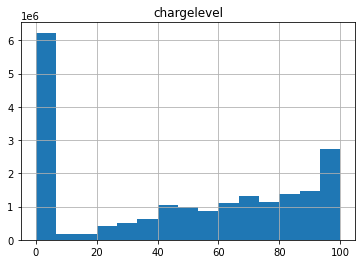

In [19]:
july_geo.hist(column = 'chargelevel', bins = 15)
plt.show()

In [20]:
july_companies = list(enumerate(july_inv.companyname.unique()))
july_companies

[(0, 'Bird'), (1, 'Jump'), (2, 'Lime'), (3, 'Lyft')]

In [21]:
unique_scooter = july_inv['sumdid'].unique()
unique_scooter

array(['PoweredJALW3', 'PoweredNLTKH', 'PoweredBNP4F', ...,
       'Powered594863', 'Powered904713', 'Powered047010'], dtype=object)

In [22]:
july_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20193663 entries, 18106104 to 9791045
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   costpermin   float64       
 6   companyname  object        
 7   geometry     geometry      
dtypes: datetime64[ns](1), float64(4), geometry(1), object(2)
memory usage: 1.4+ GB


In [23]:
july_inv.value_counts('companyname')

companyname
Jump    10367575
Bird     3702282
Lime     3233573
Lyft     2890233
dtype: int64

In [24]:
full_charge = july_inv.loc[july_inv['chargelevel'] == 100]
full_charge.head(2)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,100.0,0.15,Bird,POINT (-86.78463 36.17376)
9013191,2019-07-11 12:06:22.510,36.157701,-86.784192,PoweredNLTKH,100.0,0.15,Bird,POINT (-86.78419 36.15770)


In [25]:
dead = july_inv.loc[july_inv['chargelevel'] <5]
dead.head(2)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry
14088405,2019-07-17 18:23:13,36.12,-86.7531,Powered66a21bb4-9981-506f-a392-4b6263bf79e1,1.0,0.06,Jump,POINT (-86.75310 36.12000)
14088404,2019-07-17 18:23:13,36.12,-86.7534,Powered4501372e-4eba-5c5f-9209-5f6783eb4501,0.0,0.06,Jump,POINT (-86.75340 36.12000)


array([[<AxesSubplot:title={'center':'chargelevel'}>]], dtype=object)

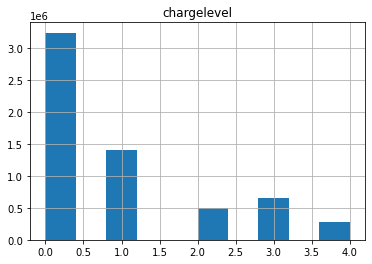

In [26]:
dead.hist('chargelevel', bins= 10)

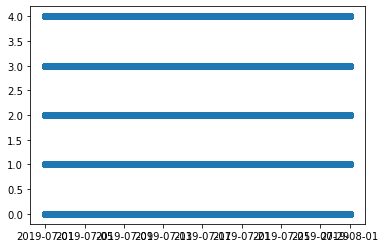

In [33]:
plt.scatter(x='pubdatetime', y= 'chargelevel', data = dead)

### july_trip data to join

In [28]:
%%time
july_trip = pd.read_csv('../data/july_trip.csv')
july_trip = july_trip.sort_values('companyName')

Wall time: 3.04 s


In [29]:
july_trip.head(5)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.000,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
34240,2019-07-07 17:30:13.820000,Bird,BRD1485,PoweredDNCQL,9.0,0.000,2019-07-07 00:00:00,17:22:50.260000,2019-07-07 00:00:00,17:32:02.596666,36.1565,-86.7754,36.1549,-86.7771,"[[36.156569,-86.775076],[36.156682,-86.775097]...",2019-07-08 05:31:19.507000
34241,2019-07-07 17:30:13.820000,Bird,BRD1492,Powered22LF9,16.0,0.000,2019-07-07 00:00:00,17:16:30.086666,2019-07-07 00:00:00,17:32:04.733333,36.1641,-86.7965,36.1600,-86.7766,"[[36.164459,-86.796071],[36.164469,-86.796059]...",2019-07-08 05:31:19.737000
34242,2019-07-07 17:30:13.820000,Bird,BRD1494,PoweredSPQ21,19.0,6233.596,2019-07-07 00:00:00,17:11:56.446666,2019-07-07 00:00:00,17:31:20.343333,36.1667,-86.7664,36.1703,-86.7556,"[[36.166688,-86.766301],[36.170331,-86.755504]]",2019-07-08 05:31:19.800000
34243,2019-07-07 17:30:13.820000,Bird,BRD1487,Powered53RQ1,9.0,0.000,2019-07-07 00:00:00,17:21:09.640000,2019-07-07 00:00:00,17:30:31.990000,36.1548,-86.7819,36.1615,-86.7750,"[[36.154871,-86.781869],[36.155727,-86.7815],[...",2019-07-08 05:31:19.583000


In [30]:
july_trip.columns = july_trip.columns.str.lower()

In [31]:
july_trip.head(5)

,pubtimestamp,companyname,triprecordnum,sumdid,tripduration,tripdistance,startdate,starttime,enddate,endtime,startlatitude,startlongitude,endlatitude,endlongitude,triproute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.000,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
34240,2019-07-07 17:30:13.820000,Bird,BRD1485,PoweredDNCQL,9.0,0.000,2019-07-07 00:00:00,17:22:50.260000,2019-07-07 00:00:00,17:32:02.596666,36.1565,-86.7754,36.1549,-86.7771,"[[36.156569,-86.775076],[36.156682,-86.775097]...",2019-07-08 05:31:19.507000
34241,2019-07-07 17:30:13.820000,Bird,BRD1492,Powered22LF9,16.0,0.000,2019-07-07 00:00:00,17:16:30.086666,2019-07-07 00:00:00,17:32:04.733333,36.1641,-86.7965,36.1600,-86.7766,"[[36.164459,-86.796071],[36.164469,-86.796059]...",2019-07-08 05:31:19.737000
34242,2019-07-07 17:30:13.820000,Bird,BRD1494,PoweredSPQ21,19.0,6233.596,2019-07-07 00:00:00,17:11:56.446666,2019-07-07 00:00:00,17:31:20.343333,36.1667,-86.7664,36.1703,-86.7556,"[[36.166688,-86.766301],[36.170331,-86.755504]]",2019-07-08 05:31:19.800000
34243,2019-07-07 17:30:13.820000,Bird,BRD1487,Powered53RQ1,9.0,0.000,2019-07-07 00:00:00,17:21:09.640000,2019-07-07 00:00:00,17:30:31.990000,36.1548,-86.7819,36.1615,-86.7750,"[[36.154871,-86.781869],[36.155727,-86.7815],[...",2019-07-08 05:31:19.583000
